# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Wholesale_Data.csv')

In [2]:
# Data Cleaning
missing_values = data.isnull().sum()
print(missing_values)

# Understanding the Data Distribution
data.describe()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


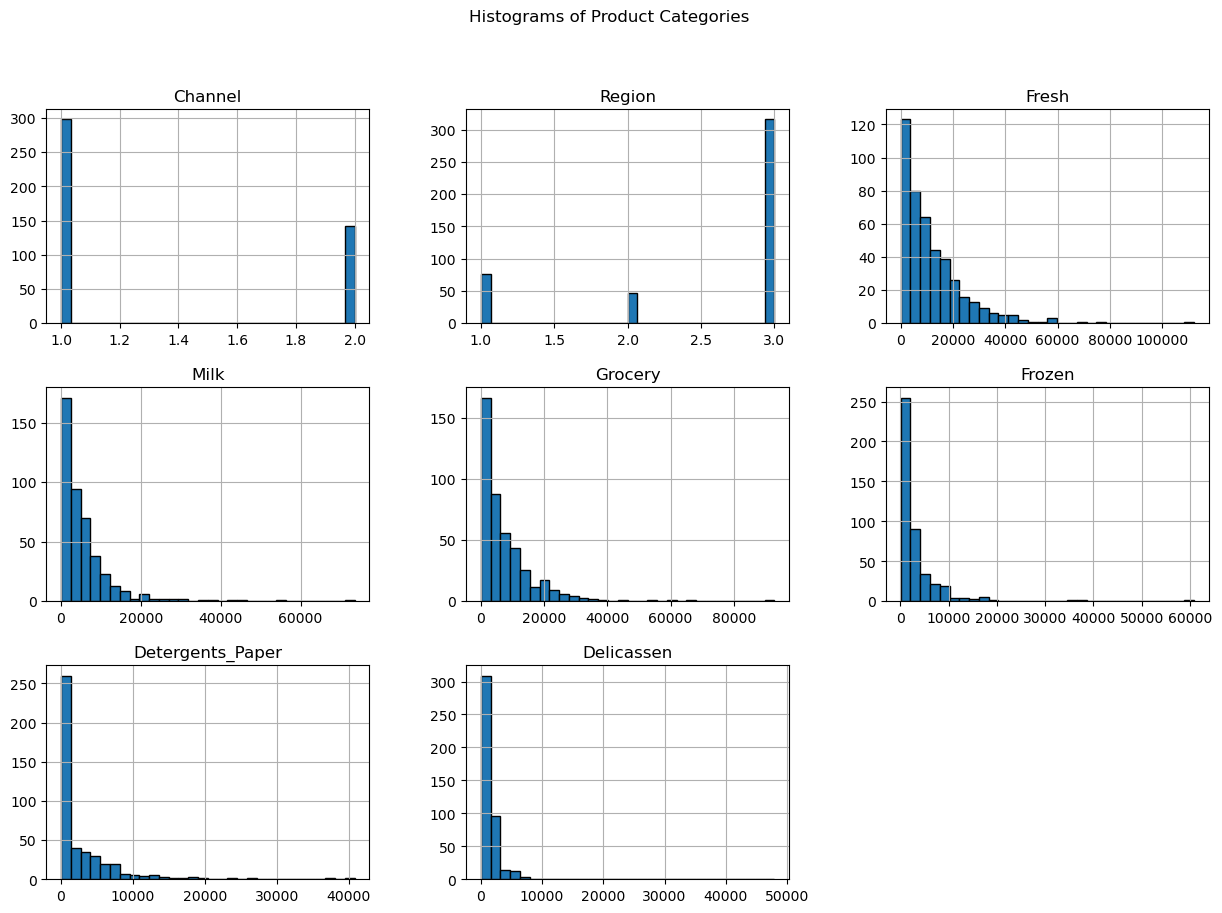

In [3]:
# Histograms
data.hist(bins=30, figsize=(15,10), layout=(3,3), edgecolor='black')
plt.suptitle("Histograms of Product Categories")
plt.show()

The visualization shows that both the channel and region columns are categorical variables. The channel column has 2 categories and the region column has 3 categories. 

The rest of the data are all right skewed with many outliers since the the first column seems to be significantly higher in comparison to the other columns.

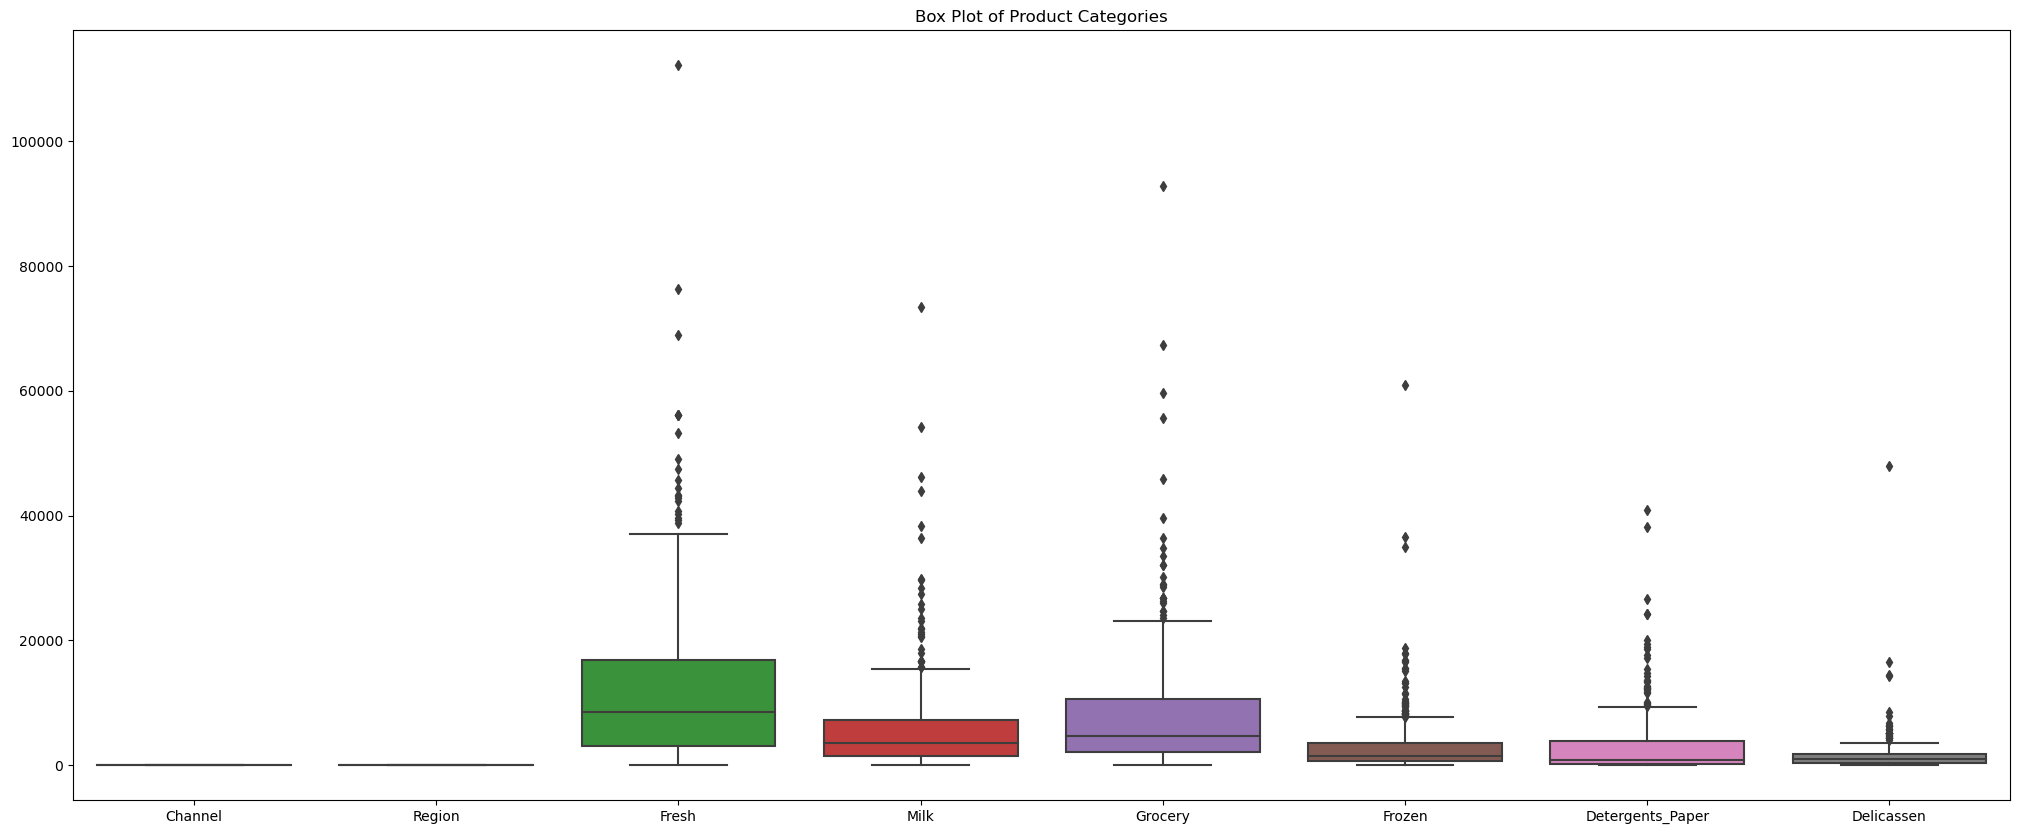

In [4]:
# Box Plots
plt.figure(figsize=(25, 10))
sns.boxplot(data=data)
plt.title("Box Plot of Product Categories")
plt.show()

As shown in the box plots, we can see that there are many outliers outside of the interquartile range, notably above the box plot.

In [5]:
# Outlier Detection

columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

outliers_count = {}

for column in columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    outliers_count[column] = len(outliers)

print(outliers_count)

{'Fresh': 20, 'Milk': 28, 'Grocery': 24, 'Frozen': 43, 'Detergents_Paper': 30, 'Delicassen': 27}


Since there isn't a significantly large number of outliers to remove, we will remove all of the outliers.

In [6]:
# Removing Outliers

columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

outlier_indices = set()

for column in columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
   
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)].index
    outlier_indices.update(outliers)

data_cleaned = data.drop(index=outlier_indices)

data_cleaned.reset_index(drop=True, inplace=True)

print("Original dataframe size:", data.shape)
print("New Dataframe size without outliers:", data_cleaned.shape)

Original dataframe size: (440, 8)
New Dataframe size without outliers: (332, 8)


About a quarter of the original data has been dropped after removing the outliers. 

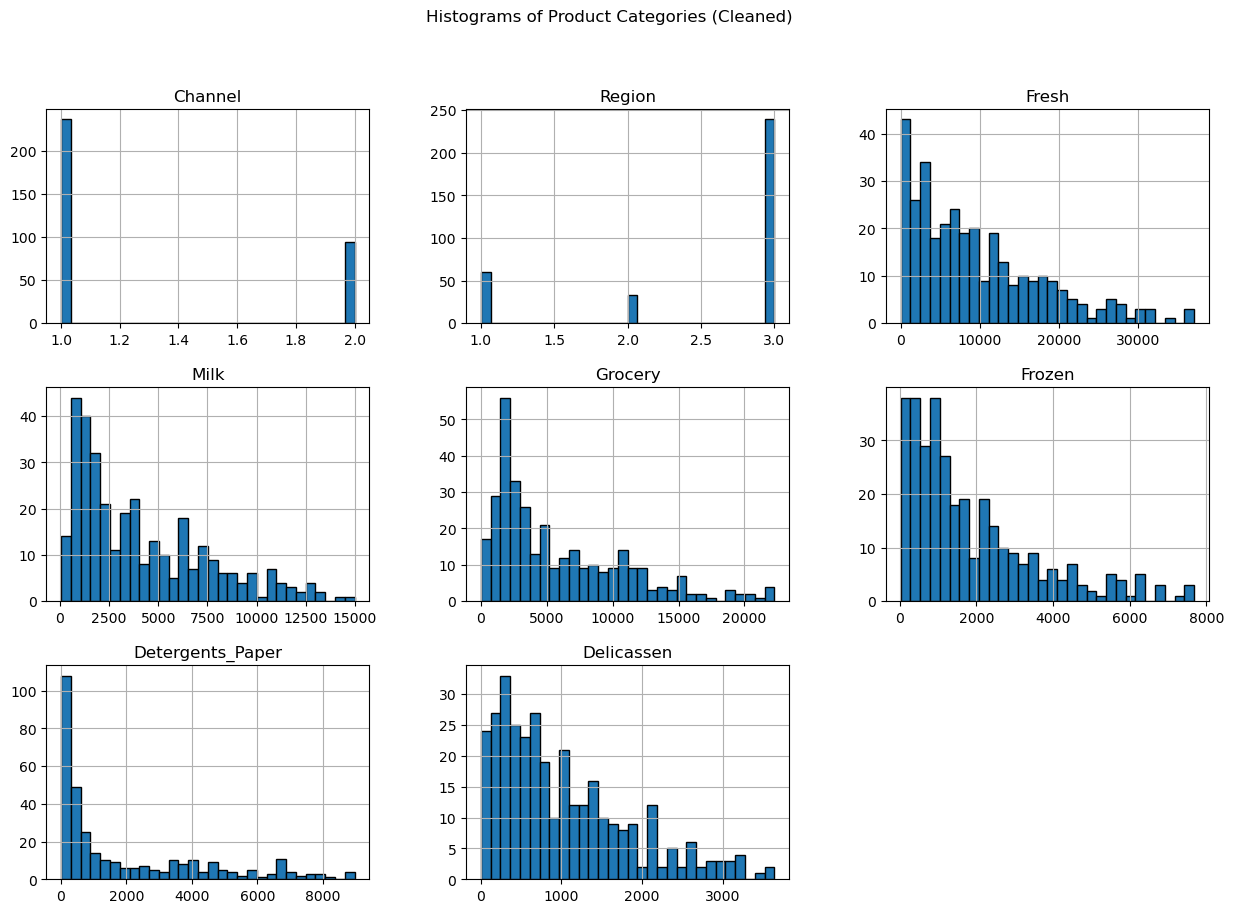

In [7]:
data_cleaned.hist(bins=30, figsize=(15,10), layout=(3,3), edgecolor='black')
plt.suptitle("Histograms of Product Categories (Cleaned)")
plt.show()

In [8]:
data_cleaned.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000
mean,1.286145,2.539157,9547.397590,4105.180723,5875.614458,1863.048193,1958.975904,1016.602410
std,0.452640,0.782148,8161.831206,3363.303146,5038.930756,1707.890373,2347.470292,824.356784
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,2989.750000,1352.500000,2011.500000,582.000000,231.750000,360.750000
50%,1.000000,3.000000,7483.500000,3087.000000,3835.500000,1270.500000,715.500000,774.000000
75%,2.000000,3.000000,13987.250000,6251.750000,8928.500000,2587.500000,3461.250000,1456.000000
max,2.000000,3.000000,37036.000000,14982.000000,22272.000000,7683.000000,8969.000000,3637.000000


# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardizing the Data
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
X = data_cleaned[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

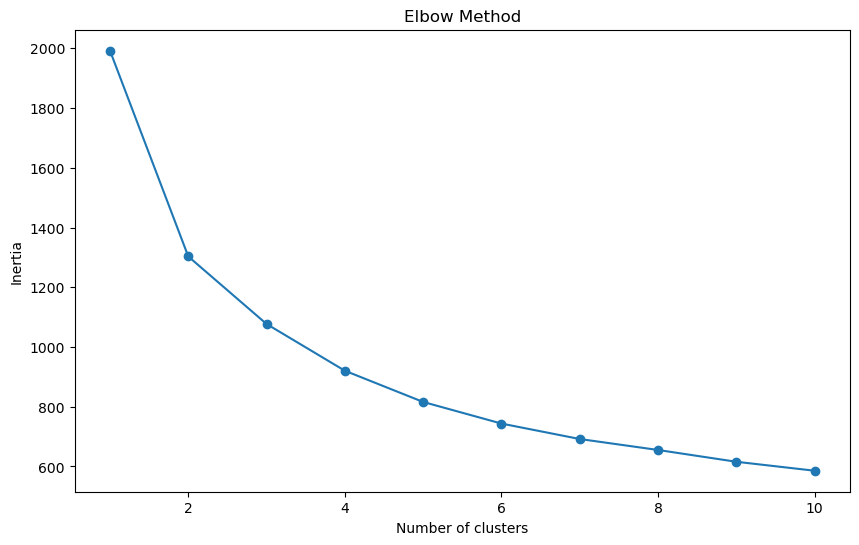

In [10]:
# Elbow Method 

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Based on the elbow method, the optimal number of clusters would be 4.

In [11]:
# K-Means Clustering

optimal_n_clusters = 4
kmeans = KMeans(n_clusters=optimal_n_clusters, n_init=10, random_state=42)
kmeans.fit(X_scaled)

clusters = kmeans.labels_

data_cleaned['Cluster'] = clusters

# Mean Values for each Cluster
cluster_means = data_cleaned.groupby('Cluster')[features].mean()
print(cluster_means)

                Fresh         Milk       Grocery       Frozen  \
Cluster                                                         
0         6902.914894  2556.226950   3344.602837   986.836879   
1         5217.064103  8175.615385  12869.538462  1268.948718   
2        11502.774648  2162.647887   2832.633803  4310.366197   
3        23161.833333  5029.666667   6527.952381  1770.809524   

         Detergents_Paper   Delicassen  
Cluster                                 
0              846.617021   631.737589  
1             5473.679487  1334.410256  
2              621.760563   859.014085  
3             1426.547619  1984.833333  


Comparing the values to the mean from the previous part, we see the explanation of our findings for each cluster below:

Cluster 0
All the spendings seem to be below average for each category in this cluster.

Cluster 1
Above average: 'Milk', 'Grocery', 'Detergents_Paper', 'Delicassen'
Below average: 'Fresh', 'Frozen'

Cluster 2
Above average: 'Fresh', 'Frozen'
Below average: 'Milk', 'Grocery', 'Detergents_Paper', 'Delicassen'

Cluster 3
Above average: 'Fresh', 'Milk', 'Grocery', 'Delicassen'
Below average: 'Frozen', 'Detergents_Paper'

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

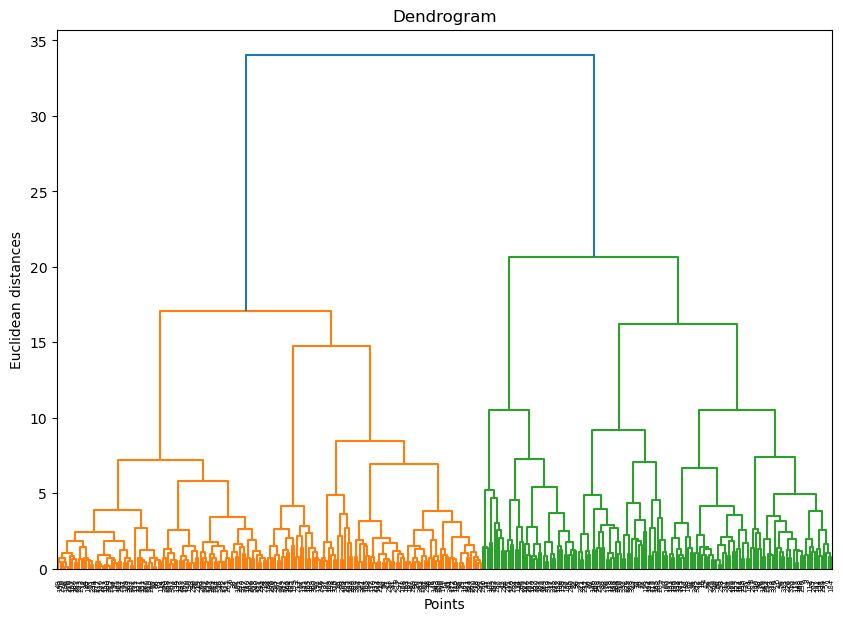

In [12]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Dendrogram

def plot_dendrogram(X, method='ward'):
    plt.figure(figsize=(10, 7))  
    dendrogram = sch.dendrogram(sch.linkage(X_scaled, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

plot_dendrogram(X_scaled)

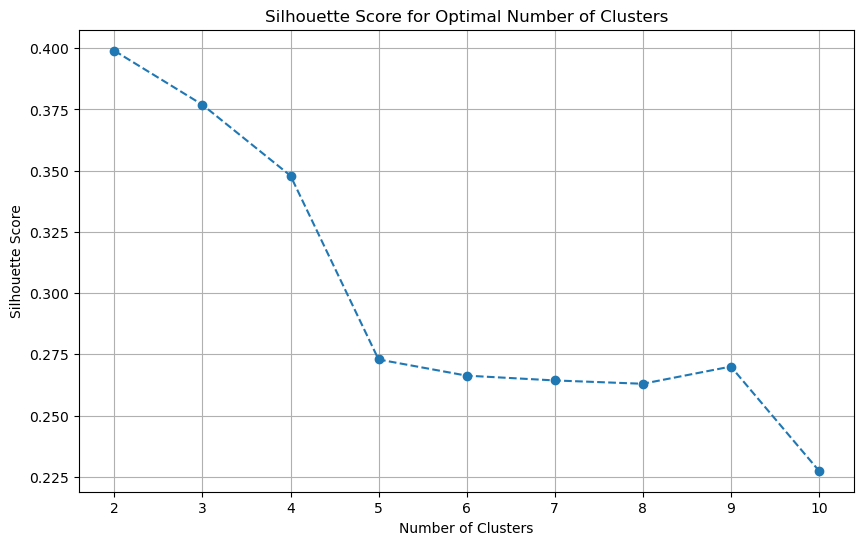

In [13]:
# Determining the Optimal Numbers of Clusters

from sklearn.metrics import silhouette_score

silhouette_scores = []

# Silhouette Score Calculations
for n_clusters in range(2, 11):
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(data_cleaned)
    silhouette_avg = silhouette_score(data_cleaned, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

Based on the silhouette score graph above, the optimal number of clusters is 2 since the highest silhouette score is at 2.

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

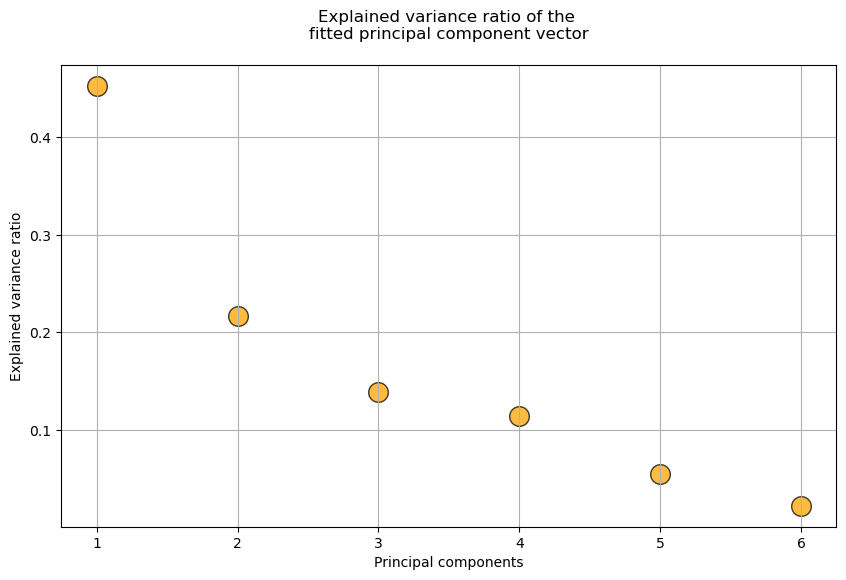

array([0.45268311, 0.21638576, 0.13897372, 0.11463788, 0.05487702,
       0.02244251])

In [14]:
from sklearn.decomposition import PCA

# Initializing PCA

pca = PCA(n_components=None)

X_scaled_pca = pca.fit(X_scaled)

# Explained Variance Ratio

plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(X_scaled_pca.explained_variance_ratio_))],
            y=X_scaled_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n")
plt.xlabel("Principal components")
plt.xticks([i+1 for i in range(len(X_scaled_pca.explained_variance_ratio_))])
plt.ylabel("Explained variance ratio")
plt.show()

pca.explained_variance_ratio_

The first 3 principal components explain about 80% of the variance ratio.

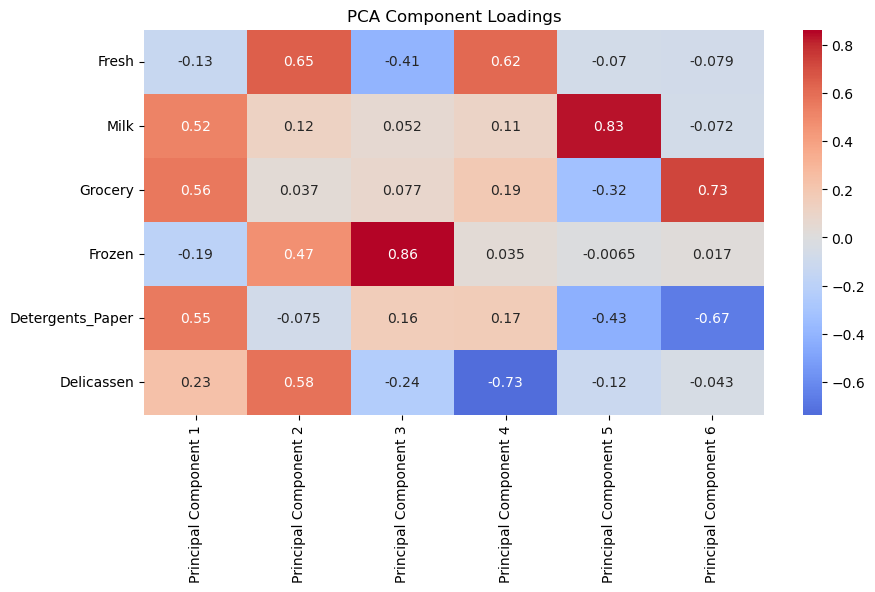

In [15]:
# Analyze Principal Components

loadings = pca.components_
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

loadings_df = pd.DataFrame(loadings.T, columns=[f'Principal Component {i}' for i in range(1, len(loadings) + 1)], index=features)

plt.figure(figsize=(10, 5))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm', center=0)
plt.title('PCA Component Loadings')
plt.show()

Principal Component 1 captures positive significant variance in customer spending on Milk, Grocery, and Detergents_Paper. This suggests that there is a type of customer who tends to purchase these three items together.

Principal Component 2 is heavily positively influenced by spending on Fresh and Delicassen. This suggests that there is a type of customer who tends to purchase these two items together.

Principal Component 3 is heavily influenced by spending on Frozen.


# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

1. The EDA shows that the distribution of the data in each product category is skewed, which means there are less customers who have large expenses.
2. The K-Means Clustering explains four different groups of customers.
3. The hierarchical clustering method favours 2 clusters instead of three.
4. The PCA explains three different spending patterns (3 principal components):
    - One that purchases Milk, Grocery, and Detergents_Paper together
    - One that purchases Fresh and Delicassen
    - One that purchases Frozen